In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
from bs4 import BeautifulSoup

from utils.utils import *
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
df = pd.read_csv('QueryResults(1).csv')
df.head()

,post_id,parent_id,Title,post_text,com_id,com_text,com_user_id,reputation,dt
0,68831096,NaN,Why can't std::stringstream be default constru...,<p>The following compiles fine (on g++ 8.3.0-6...,121644544,works fine with newer version https://godbolt....,4117728,81863,2021-08-18 10:59:42
1,68831096,NaN,Why can't std::stringstream be default constru...,<p>The following compiles fine (on g++ 8.3.0-6...,121644785,Seems to be the same question: [Why GCC doesn'...,7976805,14493,2021-08-18 10:59:42
2,68831096,NaN,Why can't std::stringstream be default constru...,<p>The following compiles fine (on g++ 8.3.0-6...,121644610,"Looks like compiler bug, it works with GCC 9.1",7976805,14493,2021-08-18 10:59:42
3,68831099,NaN,Transform an Array in JavaScript,<p>I have a simple problem that I can't solve...,121644586,"there should be examples of how to do this, it...",301774,6388,2021-08-18 10:59:46
4,68831099,NaN,Transform an Array in JavaScript,<p>I have a simple problem that I can't solve...,121644602,https://stackoverflow.com/questions/37075180/c...,301774,6388,2021-08-18 10:59:46


In [6]:
post_text = [BeautifulSoup(s, 'html.parser').text for s in list(set(df['post_text'].fillna('')))]
com_text = list(set(df['com_text'].fillna('')))
title_text = list(set(df['Title'].fillna('')))
text = post_text + com_text + title_text

In [7]:
 # Разделим текст на предложения
lst = split_text(text)

In [8]:
%%time
 # Составим словарь частоты повторения фраз длины 2
stop_words = stopwords.words('english')
cr = CountVectorizer(max_features = 300, ngram_range=(2,2), preprocessor = my_cool_preprocessor, stop_words = stop_words)
cr_vector=cr.fit_transform(lst).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 42.7 s, sys: 1.36 s, total: 44 s
Wall time: 44.1 s


In [12]:
%%time
names = cr.get_feature_names()
count = [np.sum(cr_vector[:,i]) for i in range(cr_vector.shape[1])]
dc = sort_dict(dict(zip(names, count)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 3.41 s, sys: 11.8 ms, total: 3.42 s
Wall time: 3.95 s


In [14]:
sorted(dict(zip(names, count)).items(), key=lambda item: item[1], reverse=True)

[('div class', 2517),
 ('div div', 2433),
 ('http stackoverflow', 2276),
 ('look like', 1556),
 ('com question', 1488),
 ('http www', 1349),
 ('text text', 1204),
 ('something like', 1133),
 ('td td', 1100),
 ('java org', 1065),
 ('would like', 1005),
 ('http github', 840),
 ('public void', 805),
 ('error message', 783),
 ('type text', 765),
 ('http doc', 752),
 ('public class', 750),
 ('thank much', 731),
 ('input type', 709),
 ('answer question', 688),
 ('get error', 657),
 ('work fine', 625),
 ('get set', 622),
 ('background color', 574),
 ('make sure', 570),
 ('site package', 557),
 ('class form', 534),
 ('getting error', 515),
 ('make sense', 511),
 ('doe work', 509),
 ('public static', 500),
 ('want use', 491),
 ('option option', 490),
 ('option value', 486),
 ('groupid artifactid', 485),
 ('file user', 477),
 ('na na', 469),
 ('lib python', 458),
 ('src http', 445),
 ('int main', 443),
 ('public string', 442),
 ('width px', 439),
 ('override public', 429),
 ('need use', 424),
 (

Исключим фразы с некоторыми словами, которые используются только для написания кода.
Есть и другие "вредные" фразы, слова, но определить их всех очень тяжело

In [19]:
words = ['http', 'int', 'float', 'com', 'nan', 'html', 'href', 'div']
chk_pat = '(?:{})'.format('|'.join(words))
dc1 = {k:v for k, v in dc.items() if not bool(re.search(chk_pat, k, flags=re.I))}

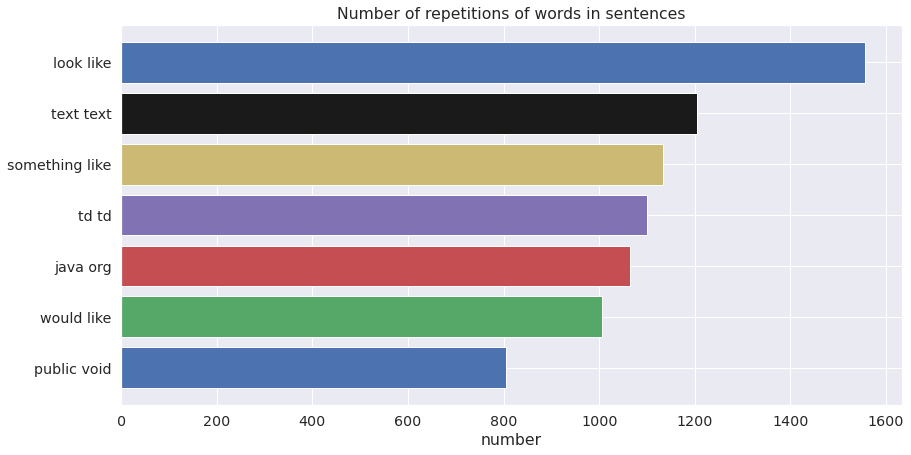

In [20]:
sns.set(font_scale=1.3)
plt.figure(figsize=(14, 7))
plt.subplots_adjust(hspace=0.5)

plt.title('Number of repetitions of words in sentences')
plt.barh(list(dc1.keys())[:7][::-1], list(dc1.values())[:7][::-1], color=['b', 'g', 'r', 'm', 'y', 'k'])
plt.xlabel('number')

plt.show()

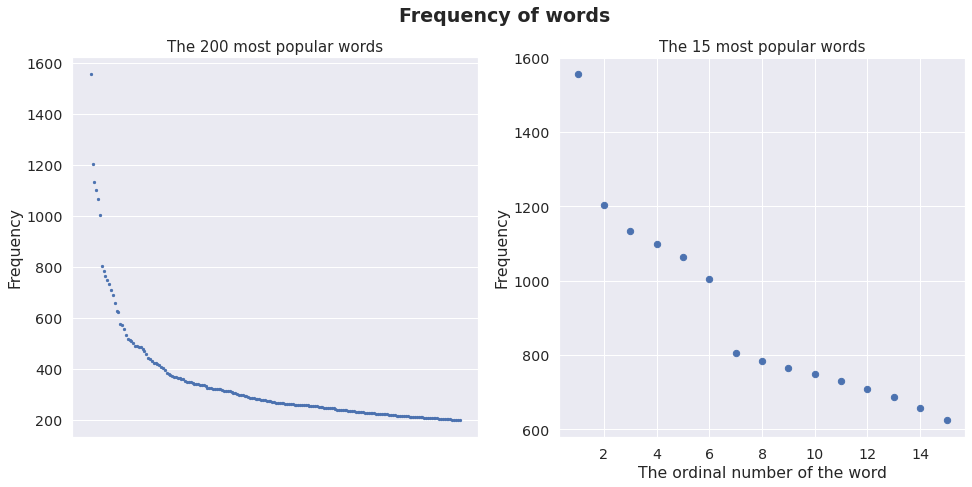

In [21]:
plot_history(dc1, a = 200, b = 15, xtitle = False)

In [ ]:
 # сохраним в файл csv
history_path_to_save='./phrases2.csv'
pd.DataFrame(list(dc1.items())).to_csv(history_path_to_save, index = False)

# Фразы из 3-х слов

In [22]:
%%time
stop_words = stopwords.words('english')
cr1 = CountVectorizer(max_features = 300, ngram_range=(3,3), preprocessor = my_cool_preprocessor, stop_words = stop_words)
cr_vector1=cr1.fit_transform(lst).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 45.1 s, sys: 1.39 s, total: 46.4 s
Wall time: 50.1 s


In [23]:
%%time
names1 = cr1.get_feature_names()
count1 = [np.sum(cr_vector1[:,i]) for i in range(cr_vector1.shape[1])]
dc1 = sort_dict(dict(zip(names1, count1)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 3.02 s, sys: 5.43 ms, total: 3.02 s
Wall time: 3 s


In [28]:
sorted(dict(zip(names1, count1)).items(), key=lambda item: item[1], reverse=True)

[('text text text', 1038),
 ('div div class', 871),
 ('div div div', 782),
 ('dependency dependency groupid', 372),
 ('na na na', 364),
 ('td td td', 358),
 ('doe answer question', 330),
 ('option option value', 330),
 ('get set public', 324),
 ('input type text', 305),
 ('override public void', 285),
 ('rat cat rat', 265),
 ('cat rat cat', 263),
 ('class form control', 260),
 ('def __init__ self', 257),
 ('text align center', 253),
 ('script src http', 251),
 ('div class col', 226),
 ('android id id', 209),
 ('lib site package', 206),
 ('version dependency dependency', 204),
 ('dependency groupid org', 201),
 ('str varchar str', 199),
 ('varchar str varchar', 199),
 ('recent call last', 198),
 ('traceback recent call', 198),
 ('font size px', 194),
 ('public static void', 194),
 ('border px solid', 188),
 ('ct ct ct', 186),
 ('itemprops exact true', 185),
 ('class btn btn', 180),
 ('nan nan nan', 177),
 ('static void main', 175),
 ('import panda pd', 174),
 ('td tr tr', 173),
 ('main 

Исключим фразы с некоторыми словами, которые используются только для написания кода.
Есть и другие "вредные" фразы, слова, но определить их всех очень тяжело. Поэтому я нашёл первую "осмысленную" фразу и убрал все фразы с большей частотой. Так я оставил фразы только частоты <= частота 'enter image description'

In [29]:
 # Исключим фразы с некоторыми словами, 
 # которые используются при написания кода
words = ['http', 'int', 'float', 'com', 'nan', 'html', 'href']
chk_pat = '(?:{})'.format('|'.join(words))
dc2 = {k:v for k, v in dc1.items() if v <= dc1['enter image description'] and not bool(re.search(chk_pat, k, flags=re.I))}

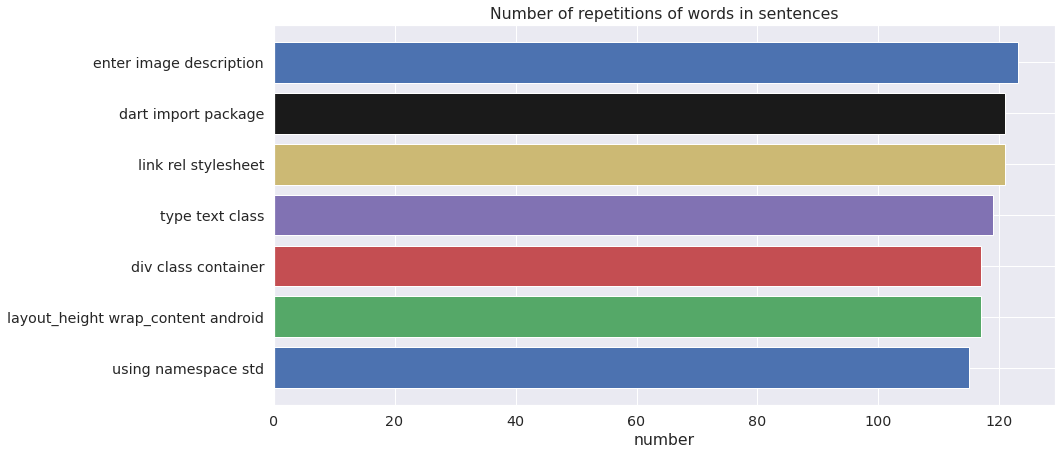

In [30]:
sns.set(font_scale=1.3)
plt.figure(figsize=(14, 7))
plt.subplots_adjust(hspace=0.5)

plt.title('Number of repetitions of words in sentences')
plt.barh(list(dc2.keys())[:7][::-1], list(dc2.values())[:7][::-1], color=['b', 'g', 'r', 'm', 'y', 'k'])
plt.xlabel('number')

plt.show()

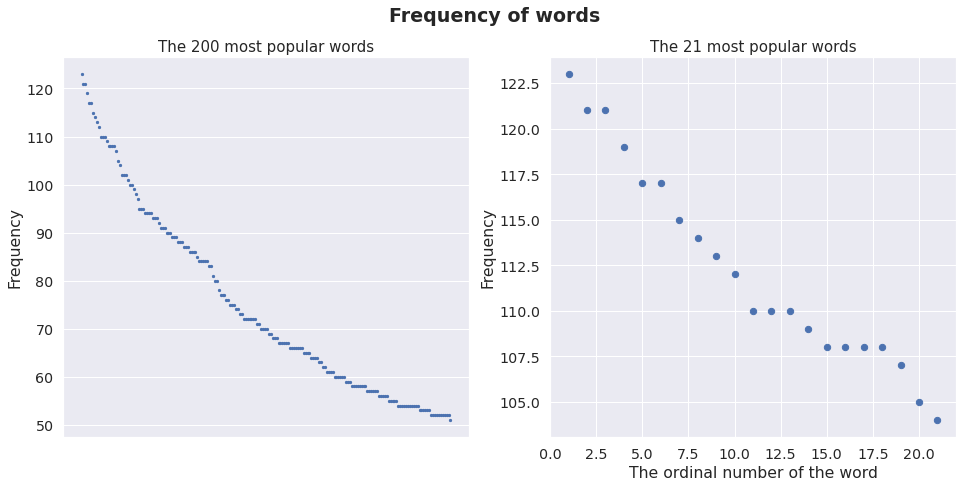

In [31]:
plot_history(dc2, a = 200, b = 21, xtitle = False)

In [ ]:
 # сохраним в файл csv
history_path_to_save='./phrases3.csv'
pd.DataFrame(list(dc2.items())).to_csv(history_path_to_save, index = False)

# Выводы

Заметим, что частотный анализ фраз, состоящих из 3-х и 2-х слов оказался плохим. Пришлось ставить ограничение на частоту фразы и отдельно исключать фразы с "вредными" словами: "http", "href" и так далее. В общем случае это довольно трудоемкий процесс

Можно сделать вывод, что искать фразы лучше другим способом